In [6]:
import sys
sys.path.append('../../../..')
import numpy as np
import matplotlib.pyplot as plt
import rivapy

In [22]:
ls_model = rivapy.models.LuciaSchwartz(rho=-.81, kappa = 0.0077, sigma1 = 5.77, mu=-0.029, sigma2=0.001)#3.1)

In [23]:
n_sims = 10_000
timegrid = np.linspace(0.0,1.0,365)
rnd = np.random.normal(size=ls_model.rnd_shape(n_sims, timegrid.shape[0]))
paths = ls_model.simulate(timegrid, start_value=np.array([0.0,0.0]), rnd=rnd)

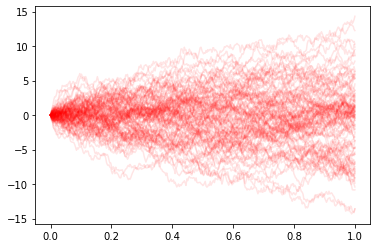

In [24]:
for i in range(100):
    plt.plot(timegrid, paths[:,i],'-r',alpha=0.1)